In [ ]:
#!pip install kaggle

In [1]:
from google.colab import files

In [2]:
! mkdir ~/.kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nrminaxundova","key":"a4fc7ee4798a79ef4730a8883214a208"}'}

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list -s flower

ref                                             title                                        size  lastUpdated          downloadCount  
----------------------------------------------  -----------------------------------------  ------  -------------------  -------------  
arshid/iris-flower-dataset                      Iris Flower Dataset                         1010B  2018-03-22 15:18:06          40603  
olgabelitskaya/flower-color-images              Flower Color Images                          50MB  2020-10-01 22:48:07           8363  
alxmamaev/flowers-recognition                   Flowers Recognition                         225MB  2021-07-16 16:00:32          57792  
uciml/iris                                      Iris Species                                  4KB  2016-09-27 07:38:05         226249  
spaics/hackathon-blossom-flower-classification  Hackathon Blossom (Flower Classification)   318MB  2019-07-14 11:59:16            916  
aksha05/flower-image-dataset                    

In [8]:
!kaggle datasets download -d alxmamaev/flowers-recognition 

 97% 217M/225M [00:09<00:00, 22.6MB/s]
100% 225M/225M [00:09<00:00, 25.1MB/s]


In [9]:
!ls

flowers-recognition.zip  kaggle.json  sample_data


In [10]:
import numpy as np 
import pandas as pd 
import os

In [11]:
!unzip ./flowers-recognition.zip

Archive:  ./flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
 

In [12]:
!ls 'Flowers Recognition (augmented)/Flowers Recognition (Augmented)'

ls: cannot access 'Flowers Recognition (augmented)/Flowers Recognition (Augmented)': No such file or directory


In [13]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [14]:
!nvidia-smi

Sun Nov 14 20:38:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
#pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [16]:
import torch
torch.__version__

'1.10.0+cu111'

In [17]:
!pip install --upgrade fastai

     |████████████████████████████████| 189 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [18]:
import fastai
fastai.__version__

'2.5.3'

In [19]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [20]:
data_path = Path('/content/flowers')
data_path.ls()


(#5) [Path('/content/flowers/dandelion'),Path('/content/flowers/rose'),Path('/content/flowers/daisy'),Path('/content/flowers/sunflower'),Path('/content/flowers/tulip')]

In [21]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

```
class RandomResizedCrop[source]
RandomResizedCrop(size, min_scale=0.08, ratio=(0.75, 1.3333333333333333), resamples=(2, 0), val_xtra=0.14, max_scale=1.0, **kwargs) :: RandTransform
```
Picks a random scaled crop of an image and resize it to size

The crop picked as a random scale in range (min_scale,max_scale) and ratio in the range passed, then the resize is done with resamples[0] for images and resamples[1] for segmentation masks. On the validation set, we center crop the image if it's ratio isn't in the range (to the minmum or maximum value) then resize.

```
crop = RandomResizedCrop(256)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = crop(img)
    show_image(cropped, ctx=ax);
    ```


 Normalize.from_stats(mean,std)]

In [22]:
data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch, 
                                    valid_pct=0.15, shuffle=True)

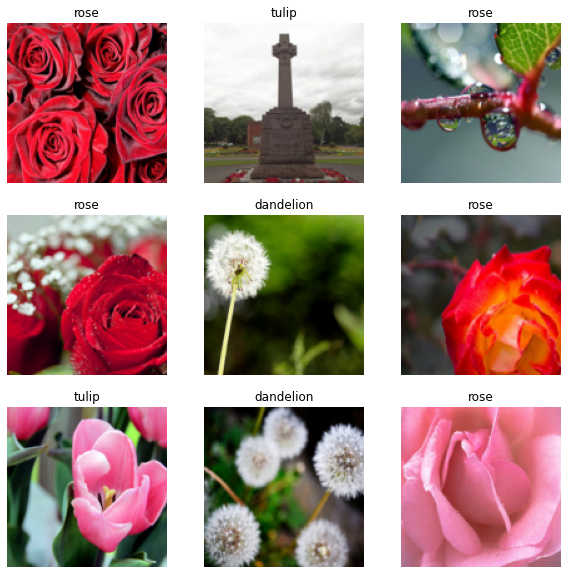

In [23]:
data.show_batch(figsize=(10,10))

In [24]:
#print("Number of classes", data.c)

In [25]:
#[print("Label #{} -> {}\n".format(i,v)) for i,v in enumerate(data.train.vocab)]

In [26]:
 from pathlib import Path
 model = cnn_learner(data, resnet34, metrics=accuracy, model_dir=Path("/kaggle/working/"),path=Path("."))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [27]:
model = cnn_learner(data, resnet34, metrics=accuracy,  model_dir="/tmp/model2/")

SuggestedLRs(valley=0.0012022644514217973)

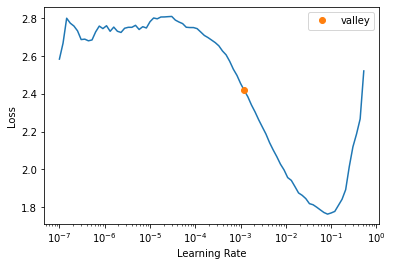

In [28]:
model.lr_find()

In [29]:
model.fit_one_cycle(2, 10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.927423,0.509364,0.819165,00:21
1,0.550585,0.356248,0.862442,00:21


In [30]:
model.save('./my_model.pkl')

Path('/tmp/model2/my_model.pkl.pth')

In [31]:
model.export("model")

In [32]:
!ls /tmp/model/

ls: cannot access '/tmp/model/': No such file or directory


In [33]:
!ls

flowers  flowers-recognition.zip  kaggle.json  sample_data


In [34]:
#filename='/tmp/model/my_model.pkl.pth'
#model2 = load_learner("/tmp/model/my_model.pkl.pth", cpu=False)

In [35]:
#m = model2['model']

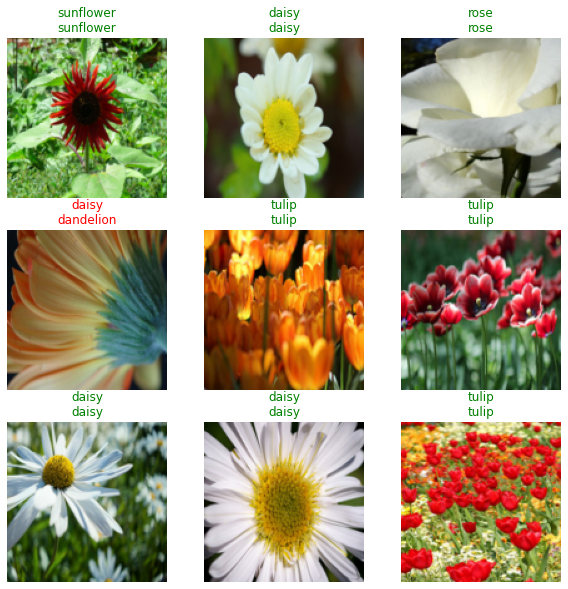

In [36]:
model.show_results(figsize=(10,10))

In [37]:
def plot_top_losses_debug(interp,idx, k=9, largest=True, **kwargs):
    if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
    if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
    else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
    k=9
    b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
    x,y,its = interp.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
    x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses, figsize=(20,20))

In [38]:
interpretation = ClassificationInterpretation.from_learner(model)
losses, idx = interpretation.top_losses()
#interpretation.plot_top_losses(4, figsize=(15,11))


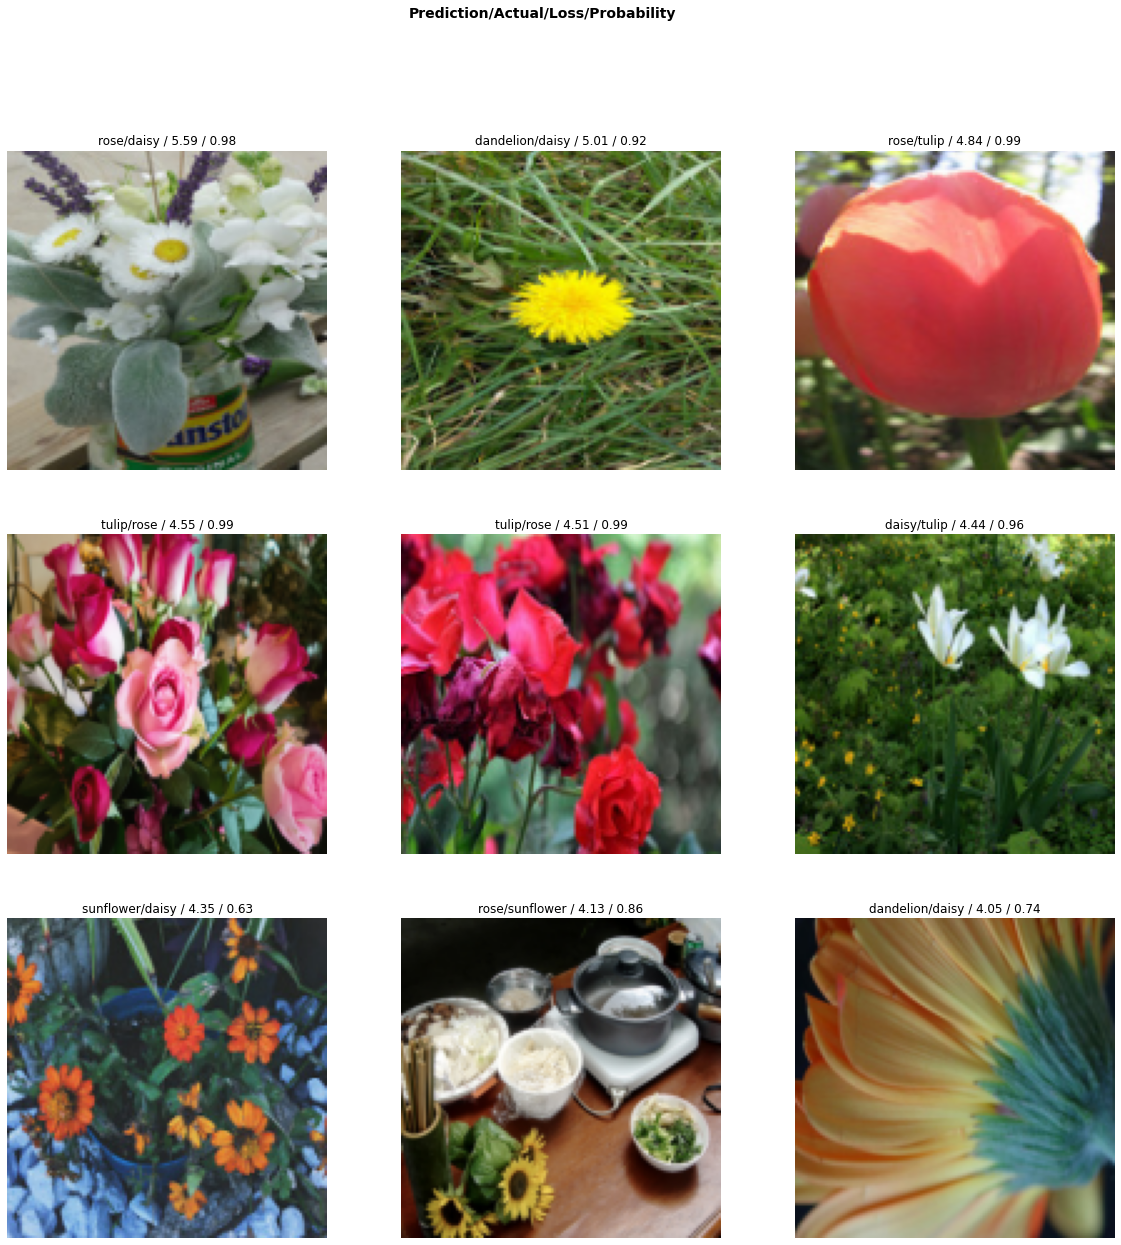

In [39]:
plot_top_losses_debug(interpretation,idx, k=9, largest=True,  figsize=(10,10))

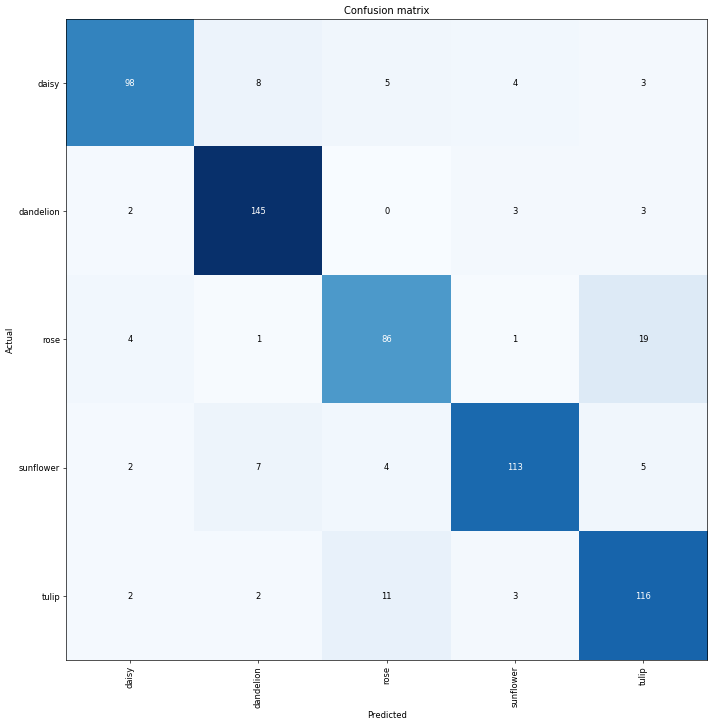

In [40]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

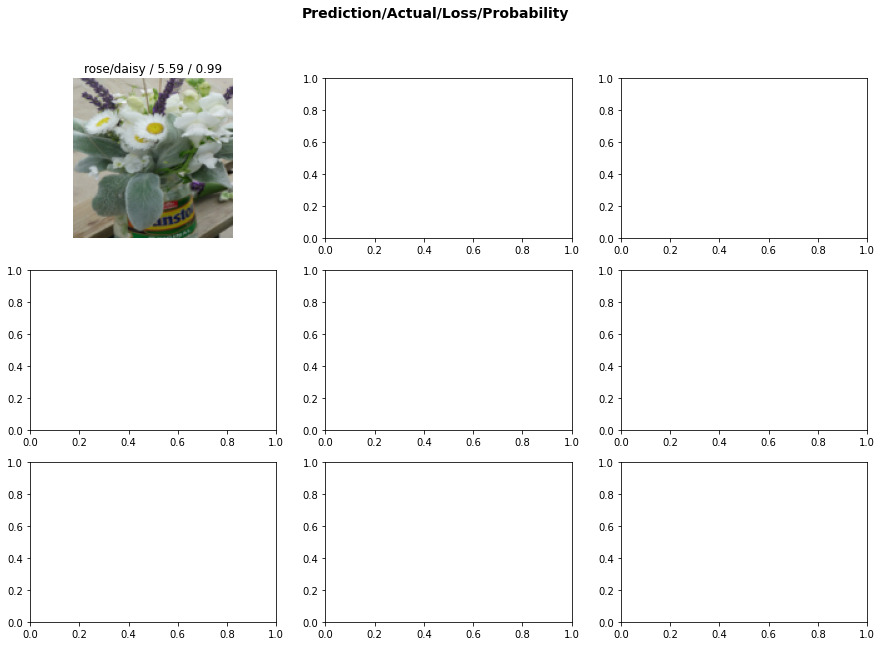

In [41]:
interpretation.plot_top_losses(9, figsize=(15,10))

In [42]:
interpretation.most_confused(min_val=2)

[('rose', 'tulip', 19),
 ('tulip', 'rose', 11),
 ('daisy', 'dandelion', 8),
 ('sunflower', 'dandelion', 7),
 ('daisy', 'rose', 5),
 ('sunflower', 'tulip', 5),
 ('daisy', 'sunflower', 4),
 ('rose', 'daisy', 4),
 ('sunflower', 'rose', 4),
 ('daisy', 'tulip', 3),
 ('dandelion', 'sunflower', 3),
 ('dandelion', 'tulip', 3),
 ('tulip', 'sunflower', 3),
 ('dandelion', 'daisy', 2),
 ('sunflower', 'daisy', 2),
 ('tulip', 'daisy', 2),
 ('tulip', 'dandelion', 2)]